# 1. 기본 세팅

In [19]:
import pandas as pd
import numpy as np

from datetime import date
import warnings
warnings.filterwarnings('ignore')

In [20]:

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

mpl.rcParams['axes.unicode_minus'] = False

In [21]:
import folium
import os

In [22]:
df = pd.read_csv('data/reg.csv')
df.head()

,식당,방송,방영전,방영후,증가,서울,방영월
0,136생고기,생생정보,4,45,41,0,3
1,3일한우국밥,생생정보,35,51,16,1,3
2,가람떡갈비,맛있는녀석들,21,50,29,1,1
3,가마솥 족발,생생정보,31,106,75,0,3
4,가마솥손두부,생생정보,11,45,34,1,4


In [23]:
df_tidy = pd.read_csv('data/reg_tidy.csv')
df_tidy.head()

,식당,방영전,방영후,증가,방영월,방송_맛있는녀석들,방송_생생정보,방송_수요미식회,서울_0,서울_1,계절_가을,계절_겨울,계절_봄,계절_여름
0,136생고기,4,45,41,3,0,1,0,1,0,0,0,1,0
1,3일한우국밥,35,51,16,3,0,1,0,0,1,0,0,1,0
2,가람떡갈비,21,50,29,1,1,0,0,0,1,0,1,0,0
3,가마솥 족발,31,106,75,3,0,1,0,1,0,0,0,1,0
4,가마솥손두부,11,45,34,4,0,1,0,0,1,0,0,1,0


# 2. 필요한 컬럼과 데이터프레임 만들기

In [24]:
df['증가율'] = 100 * (df['방영후'] / df['방영전'])
df.head()

,식당,방송,방영전,방영후,증가,서울,방영월,증가율
0,136생고기,생생정보,4,45,41,0,3,1125.000000
1,3일한우국밥,생생정보,35,51,16,1,3,145.714286
2,가람떡갈비,맛있는녀석들,21,50,29,1,1,238.095238
3,가마솥 족발,생생정보,31,106,75,0,3,341.935484
4,가마솥손두부,생생정보,11,45,34,1,4,409.090909


In [25]:
df['방영전_log'] = np.log(df['방영전'])
df['증가율_log'] = np.log(df['증가율'])
df['증가_log'] = np.log(df['증가'])
df.head()

,식당,방송,방영전,방영후,증가,서울,방영월,증가율,방영전_log,증가율_log,증가_log
0,136생고기,생생정보,4,45,41,0,3,1125.000000,1.386294,7.025538,3.713572
1,3일한우국밥,생생정보,35,51,16,1,3,145.714286,3.555348,4.981648,2.772589
2,가람떡갈비,맛있는녀석들,21,50,29,1,1,238.095238,3.044522,5.472671,3.367296
3,가마솥 족발,생생정보,31,106,75,0,3,341.935484,3.433987,5.834622,4.317488
4,가마솥손두부,생생정보,11,45,34,1,4,409.090909,2.397895,6.013937,3.526361


In [26]:
df1 = df[['방송','식당','방영전','방영전_log','방영후','증가','증가_log','증가율','증가율_log']]
df1.head()

,방송,식당,방영전,방영전_log,방영후,증가,증가_log,증가율,증가율_log
0,생생정보,136생고기,4,1.386294,45,41,3.713572,1125.000000,7.025538
1,생생정보,3일한우국밥,35,3.555348,51,16,2.772589,145.714286,4.981648
2,맛있는녀석들,가람떡갈비,21,3.044522,50,29,3.367296,238.095238,5.472671
3,생생정보,가마솥 족발,31,3.433987,106,75,4.317488,341.935484,5.834622
4,생생정보,가마솥손두부,11,2.397895,45,34,3.526361,409.090909,6.013937


In [27]:
df1.columns = ['방송','식당명','방영전','방영전_log','방영후','증가','증가_log','증가율','증가율_log']
df1.head()

,방송,식당명,방영전,방영전_log,방영후,증가,증가_log,증가율,증가율_log
0,생생정보,136생고기,4,1.386294,45,41,3.713572,1125.000000,7.025538
1,생생정보,3일한우국밥,35,3.555348,51,16,2.772589,145.714286,4.981648
2,맛있는녀석들,가람떡갈비,21,3.044522,50,29,3.367296,238.095238,5.472671
3,생생정보,가마솥 족발,31,3.433987,106,75,4.317488,341.935484,5.834622
4,생생정보,가마솥손두부,11,2.397895,45,34,3.526361,409.090909,6.013937


In [28]:
mashit_df = df1.loc[df1['방송'] == '맛있는녀석들']
mashit_df.head()

,방송,식당명,방영전,방영전_log,방영후,증가,증가_log,증가율,증가율_log
2,맛있는녀석들,가람떡갈비,21,3.044522,50,29,3.367296,238.095238,5.472671
10,맛있는녀석들,강촌원조쭈꾸미,7,1.945910,46,39,3.663562,657.142857,6.487901
12,맛있는녀석들,개미집,13,2.564949,20,7,1.945910,153.846154,5.035953
14,맛있는녀석들,개화옥 등심,1,0.000000,8,7,1.945910,800.000000,6.684612
17,맛있는녀석들,건대통골뱅이,12,2.484907,36,24,3.178054,300.000000,5.703782


In [29]:
sangsang_df = df1.loc[df1['방송'] == '생생정보']
sangsang_df.head()

,방송,식당명,방영전,방영전_log,방영후,증가,증가_log,증가율,증가율_log
0,생생정보,136생고기,4,1.386294,45,41,3.713572,1125.000000,7.025538
1,생생정보,3일한우국밥,35,3.555348,51,16,2.772589,145.714286,4.981648
3,생생정보,가마솥 족발,31,3.433987,106,75,4.317488,341.935484,5.834622
4,생생정보,가마솥손두부,11,2.397895,45,34,3.526361,409.090909,6.013937
5,생생정보,갈비구락부,36,3.583519,46,10,2.302585,127.777778,4.850293


In [30]:
suyo_df = df1.loc[df1['방송'] == '수요미식회']
suyo_df.head()

,방송,식당명,방영전,방영전_log,방영후,증가,증가_log,증가율,증가율_log
6,수요미식회,갓포치유,24,3.178054,74,50,3.912023,308.333333,5.731181
7,수요미식회,강릉감자옹심이,177,5.176150,295,118,4.770685,166.666667,5.115996
9,수요미식회,강촌 숯불 닭갈비,42,3.737670,138,96,4.564348,328.571429,5.794754
13,수요미식회,개화옥,21,3.044522,72,51,3.931826,342.857143,5.837314
15,수요미식회,갯바위,5,1.609438,40,35,3.555348,800.000000,6.684612


In [31]:
drop_outlier = df1.loc[(df['방영전'] < 200) & (df['증가'] < 150)]
drop_outlier.head()

,방송,식당명,방영전,방영전_log,방영후,증가,증가_log,증가율,증가율_log
0,생생정보,136생고기,4,1.386294,45,41,3.713572,1125.000000,7.025538
1,생생정보,3일한우국밥,35,3.555348,51,16,2.772589,145.714286,4.981648
2,맛있는녀석들,가람떡갈비,21,3.044522,50,29,3.367296,238.095238,5.472671
3,생생정보,가마솥 족발,31,3.433987,106,75,4.317488,341.935484,5.834622
4,생생정보,가마솥손두부,11,2.397895,45,34,3.526361,409.090909,6.013937


# 3. scatter plot

### scatter plot 옵션

function matplotlib.pyplot.scatter(x, y, s=None, c=None, marker=None, cmap=None, norm=None, vmin=None, vmax=None, alpha=None, linewidths=None, verts=None, edgecolors=None, hold=None, data=None, **kwargs

In [32]:
plt.rcParams["font.family"] = 'Noto Sans CJK SC'
plt.rcParams["font.size"] = 12

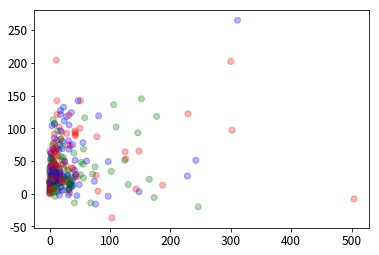

In [33]:
plt.scatter(df1['방영전'],df1['증가'], color =['red','green','blue'], alpha = 0.3)

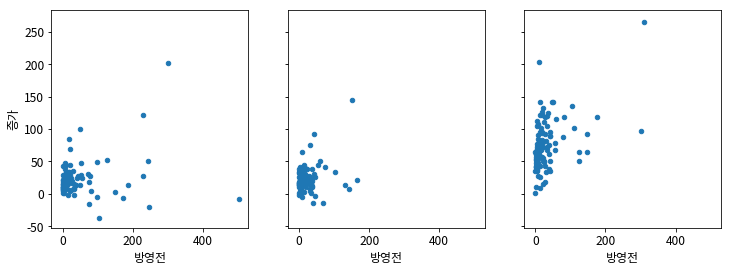

In [34]:
fig, axes = plt.subplots(1, 3, figsize=(12, 4), sharey=True, sharex=True)
for ax, (name, subdf) in zip(axes, df1.groupby(by="방송")):
    subdf.plot.scatter(x="방영전", y="증가", ax=ax)
    
# 맛있는녀석들, 생생정보통, 수요미식회

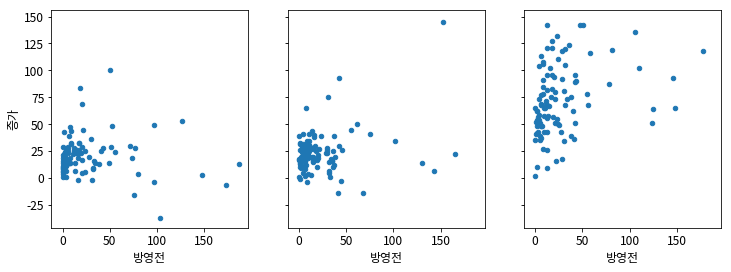

In [35]:
# outlier를 제거한 산점도

fig, axes = plt.subplots(1, 3, figsize=(12, 4), sharey=True, sharex=True)

for ax, (name, subdf) in zip(axes, drop_outlier.groupby(by="방송")):
    subdf.plot.scatter(x="방영전", y="증가", ax=ax)

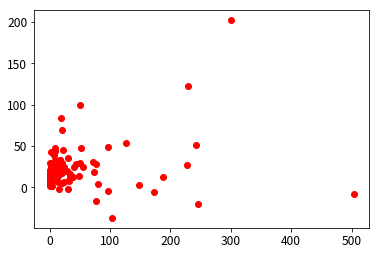

In [36]:
plt.scatter(mashit_df['방영전'],mashit_df['증가'], color = 'red')

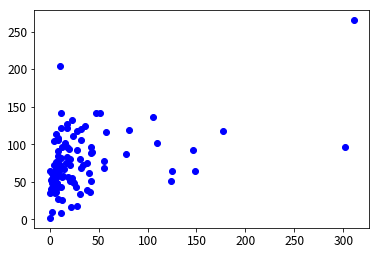

In [37]:
plt.scatter(suyo_df['방영전'],suyo_df['증가'], color = 'blue')

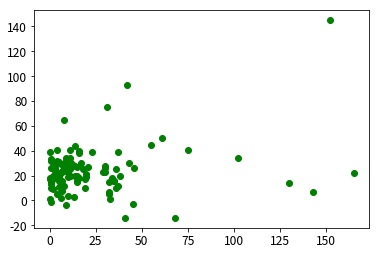

In [38]:
plt.scatter(sangsang_df['방영전'],sangsang_df['증가'], color = 'green')

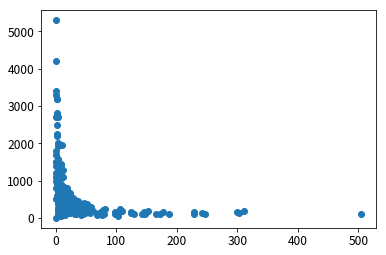

In [39]:
plt.scatter(df1['방영전'],df1['증가율'])

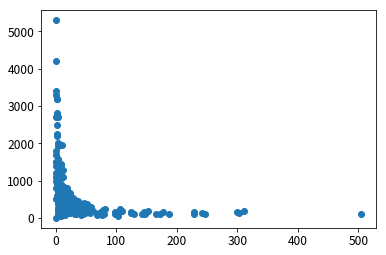

In [40]:
plt.scatter(df1['방영전'],df1['증가율'])

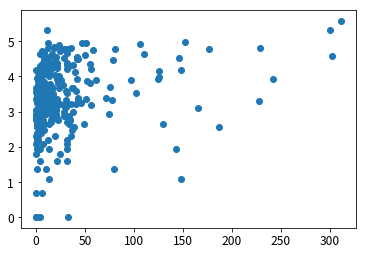

In [41]:
plt.scatter(df1['방영전'],df1['증가_log'])

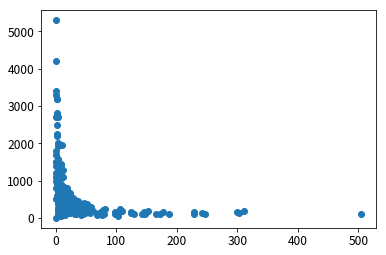

In [42]:
plt.scatter(df1['방영전'],df1['증가율'])

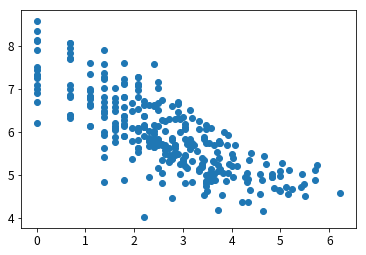

In [43]:
plt.scatter(df1['방영전_log'],df1['증가율_log'])

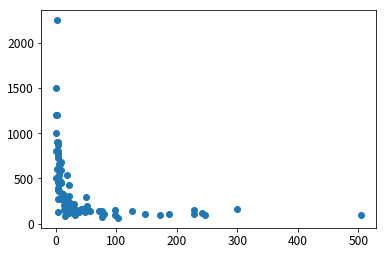

In [44]:
plt.scatter(mashit_df['방영전'],mashit_df['증가율'])

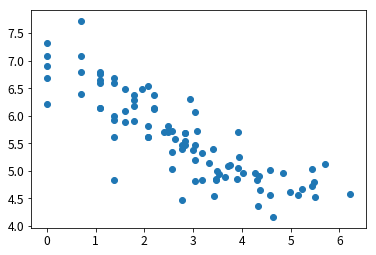

In [45]:
plt.scatter(mashit_df['방영전_log'],mashit_df['증가율_log'])

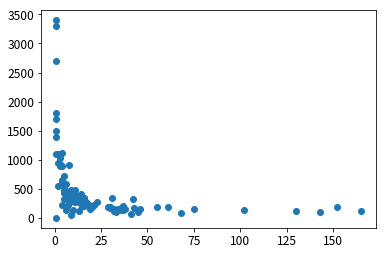

In [46]:
plt.scatter(sangsang_df['방영전'],sangsang_df['증가율'])

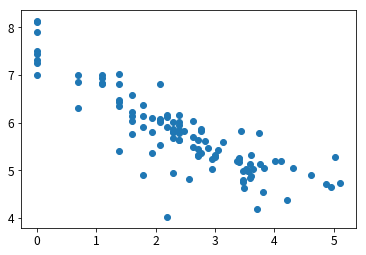

In [47]:
plt.scatter(sangsang_df['방영전_log'],sangsang_df['증가율_log'])

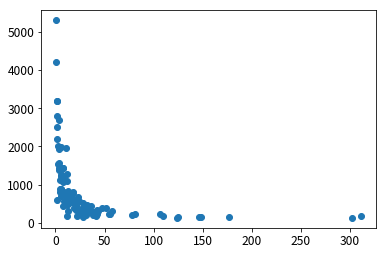

In [48]:
plt.scatter(suyo_df['방영전'],suyo_df['증가율'])

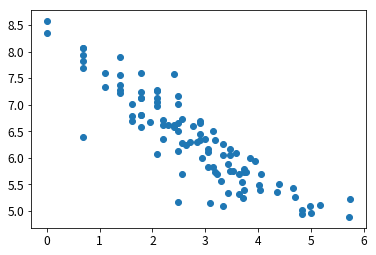

In [49]:
plt.scatter(suyo_df['방영전_log'],suyo_df['증가율_log'])


# 4. 지도 찍어보기

In [72]:
suyo_map = pd.read_csv('data/suyo_map.csv')
suyo_map = suyo_map.drop(['업종'], axis = 1)
suyo_map.head()

,방송명,방송날짜,식당명,주소
0,수요미식회,2017년 1월 4일,오통영,서울특별시 강남구 선릉로158길 10 한나빌딩 지하2층
1,수요미식회,2017년 1월 4일,안동장,서울특별시 중구 을지로 124
2,수요미식회,2017년 1월 11일,평양집,서울특별시 용산구 한강대로 186
3,수요미식회,2017년 1월 11일,까사디노아,서울 마포구 연남동 257-8 1층
4,수요미식회,2017년 2월 1일,덕자네 방앗간,서울특별시 서초구 사평대로56길 7


In [61]:
mashit_map = pd.read_csv('data/mashit_map.csv')

mashit_map.head()

,방송명,방송날짜,식당명,주소
0,맛있는 녀석들,2017년 1월 6일,내호냉면,부산시 남구 우암동 189-671
1,맛있는 녀석들,2017년 1월 6일,한방장어구이,부산시 해운대구 중동 1396-59
2,맛있는 녀석들,2017년 1월 13일,김영자 나주곰탕,서울 관악구 신림동 110-6
3,맛있는 녀석들,2017년 1월 13일,강촌원조쭈꾸미,서울 서초구 양재동 11-6
4,맛있는 녀석들,2017년 2월 3일,바다회사랑,서울 마포구 서교동 352-1


In [65]:
sangsang_map = pd.read_csv('data/sangsang_map.csv')
sangsang_map.columns = ['방송명', '방송날짜', '식당명', '주소']

sangsang_map.head()

,방송명,방송날짜,식당명,주소
0,생생정보통,2017년 1월 3일,대풍만두,경북 안동시 번영길 21
1,생생정보통,2017년 1월 12일,여인천하조개구이,인천 중구 마시란로 107-11
2,생생정보통,2017년 1월 13일,제일정육정식당,경기 오산시 오산로 164
3,생생정보통,2017년 1월 31일,광명식당,제주특별자치도 제주시 동문로4길 9
4,생생정보통,2017년 2월 1일,칡산에,강원도 원주시 금불4길 25-5


In [73]:
df_map = suyo_map.append(mashit_map, ignore_index=True)
df_map = df_map.append(sangsang_map, ignore_index=True)
df_map

,방송명,방송날짜,식당명,주소
0,수요미식회,2017년 1월 4일,오통영,서울특별시 강남구 선릉로158길 10 한나빌딩 지하2층
1,수요미식회,2017년 1월 4일,안동장,서울특별시 중구 을지로 124
2,수요미식회,2017년 1월 11일,평양집,서울특별시 용산구 한강대로 186
3,수요미식회,2017년 1월 11일,까사디노아,서울 마포구 연남동 257-8 1층
4,수요미식회,2017년 2월 1일,덕자네 방앗간,서울특별시 서초구 사평대로56길 7
5,수요미식회,2017년 2월 1일,루비떡볶이,서울특별시 강남구 선릉로153길 21
6,수요미식회,2017년 2월 8일,참식당,서울특별시 마포구 토정로 311
7,수요미식회,2017년 2월 8일,갯바위,서울특별시 관악구 남부순환로216길 1
8,수요미식회,2017년 2월 15일,포담,서울특별시 종로구 자하문로9길 11
9,수요미식회,2017년 2월 15일,따빠스구르메,서울특별시 종로구 자하문로9길 7 1층


In [74]:
df_map = pd.merge(df1, df_map, on='식당명')
df_map.head()

,방송,식당명,방영전,방영전_log,방영후,증가,증가_log,증가율,증가율_log,방송명,방송날짜,주소
0,생생정보,136생고기,4,1.386294,45,41,3.713572,1125.000000,7.025538,생생정보통,2017년 3월 17일,인천 계양구 작전동 136번지
1,생생정보,3일한우국밥,35,3.555348,51,16,2.772589,145.714286,4.981648,생생정보통,2018년 3월 8일,서울 영등포구 영등포로 204
2,맛있는녀석들,가람떡갈비,21,3.044522,50,29,3.367296,238.095238,5.472671,맛있는 녀석들,2018년 1월 5일,서울 용산구 한강로 3가 40-441
3,생생정보,가마솥 족발,31,3.433987,106,75,4.317488,341.935484,5.834622,생생정보통,2018년 3월 22일,경북 경주시 봉황로 39-1
4,생생정보,가마솥손두부,11,2.397895,45,34,3.526361,409.090909,6.013937,생생정보통,2018년 4월 13일,서울 동작구 남부순환로 271길 20


In [75]:
df_map.to_csv('data/df_map.csv', index = False)